In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
def imshow(image: np.array, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.show()

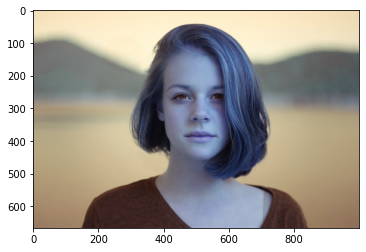

In [20]:
from models.image import Image

# load the image
image = Image(path='../data/images/test.jpg')

imshow(image.img)


In [30]:
# import your func
from modules.thresholding import threshHandler

imshow(threshHandler(image, {'threshold_value': 150}).img, cmap='gray')

error: OpenCV(4.4.0) /tmp/pip-req-build-vu_aq9yd/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1
